In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set()

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
print(os.listdir("../input"))



['world-food-facts']


In [2]:
original = pd.read_csv('../input/world-food-facts/en.openfoodfacts.org.products.tsv',
                        delimiter='\t',
                       encoding='utf-8')

original.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
original.shape

(356027, 163)

In [4]:
list(original.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [5]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [6]:
original.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 163, dtype: object

In [7]:
original.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,382.000000,49.400000,1.000000e-01,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1092.000000,300.000000,5.290000e+00,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1674.000000,900.000000,2.000000e+01,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [8]:
original.describe(include=['object', 'bool'])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url
count,356001,356001,356024,356024,356017,356027,356027,338515,57714,119285,...,254856,129006,132689,355975,355975,355975,103249,103249,75725,75725
unique,355839,356001,3890,224812,224752,216936,216836,249245,42451,15563,...,5,14,42,1068,1068,1068,3639,3639,75725,75725
top,70650800367,http://world-en.openfoodfacts.org/product/0787...,usda-ndb-import,1489055829,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",en:plant-based-foods-and-beverages,Plant-based foods and beverages,http://en.openfoodfacts.org/images/products/32...,http://en.openfoodfacts.org/images/products/30...
freq,3,1,169868,20,20,30,30,411,201,5285,...,72436,43603,43603,167862,167862,167862,22950,22950,1,1


je constate que nous avons plusieurs variables catégorielles à savoir: creator, product_name, generic_name, main_category, main_category_en. je crois que nous pouvons créer un système de recommandation en fonction du product_name, creato et main category.

In [9]:
original['nutrition_grade_fr'].value_counts()

d    72436
c    52870
e    50236
a    40304
b    39010
Name: nutrition_grade_fr, dtype: int64

In [10]:
original['pnns_groups_1'].value_counts()

unknown                    43603
Sugary snacks              14750
Beverages                  13476
Milk and dairy products    10733
Cereals and potatoes       10078
Fish Meat Eggs              9473
Composite foods             7972
Fat and sauces              7122
Fruits and vegetables       6763
Salty snacks                3299
fruits-and-vegetables       1098
sugary-snacks                619
cereals-and-potatoes          19
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [11]:
original.fillna(0, inplace= True)
original.head()
original = original[ original["nutrition_grade_fr"] != 0]

In [12]:
original['nutrition_grade_fr'].value_counts()

d    72436
c    52870
e    50236
a    40304
b    39010
Name: nutrition_grade_fr, dtype: int64

In [13]:
original['pnns_groups_2'].value_counts()

0                                   156403
unknown                              32352
One-dish meals                        5419
Biscuits and cakes                    4810
Non-sugared beverages                 4398
Sweets                                4093
Cereals                               3842
Milk and yogurt                       3561
Cheese                                3545
Dressings and sauces                  3395
Processed meat                        3023
Chocolate products                    2939
Sweetened beverages                   2480
Fish and seafood                      2278
Appetizers                            2195
Fats                                  2161
Bread                                 1977
Fruit juices                          1889
Vegetables                            1875
Breakfast cereals                     1597
Fruits                                1413
Meat                                  1235
Ice cream                              864
Dairy desse

In [14]:
original= original[(original['sugars_100g'] >= 0) & (original['sugars_100g'] <=100)]
original= original[(original['fat_100g'] >= 0) & (original['fat_100g'] <=100)]
original= original[(original['carbohydrates_100g'] >= 0) & (original['carbohydrates_100g'] <=100)]
original= original[(original['salt_100g'] >= 0) & (original['salt_100g'] <=100)]
original= original[(original['proteins_100g'] >= 0) & (original['proteins_100g'] <=100)]
original= original[(original['nutrition-score-fr_100g'] >= 0) & (original['nutrition-score-fr_100g'] <=100)]
original= original[(original['nutrition-score-uk_100g'] >= 0) & (original['nutrition-score-uk_100g'] <=100)]
original.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0
7,16124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0
12,16872,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0


In [15]:
original_cols = ["sugars_100g",
                       "salt_100g",
                       "fat_100g",
                       "proteins_100g",
                       "carbohydrates_100g",
                       "energy_100g",
                   "nutrition_grade_fr","g_sum", "other_carbs"]

In [16]:
original["g_sum"] = original.fat_100g + original.salt_100g + original.proteins_100g + original.carbohydrates_100g
original["g_sum"] = round(original.g_sum)
original["other_carbs"] = original.carbohydrates_100g - original.sugars_100g
original["reconstructed_energy"] = original.fat_100g * 37 + (original.proteins_100g + original.carbohydrates_100g) * 17

In [17]:
original = original[original_cols].copy()

original["isempty"] = np.where(original.isnull().sum(axis = 1) >= 1, 1, 0)
percentage = (original.isempty.value_counts()[0] / original.shape[0]) * 100
print("percentage of incomplete tables:" + str(percentage))

original = original[original.isempty == 0].copy()
original.isnull().sum()

original.drop("isempty", inplace = True, axis = 1)
original.dropna(axis = 0, how = "any", inplace = True)

percentage of incomplete tables:100.0


In [18]:
meta = pd.DataFrame(index = original.index)
for col in original.columns:
    meta["zero_"+ col] = np.where(original[col]== 0, 1, 0)
meta["contains_zero"] = np.where(meta.sum(axis=1) > 0, 1, 0)

In [19]:
for col in ["sugars_100g",
                       "salt_100g",
                       "fat_100g",
                       "proteins_100g",
                       "carbohydrates_100g",
                       "energy_100g"]:
    if col not in ["energy_100g", "reconstructed_energy"]:
        original = original.loc[original[col] <= 100]
    original = original.loc[original[col]>= 0]
    
original = original.loc[original.energy_100g <= 3700]
original = original.loc[original.carbohydrates_100g >= original.sugars_100g]
original = original.loc[original.g_sum <= 100]

In [20]:
percent_of_nans = original.isnull().sum().sort_values(ascending=False) / original.shape[0] * 100

In [21]:
low_nans = percent_of_nans[percent_of_nans <= 15]
middle_nans = percent_of_nans[(percent_of_nans > 15) & (percent_of_nans <= 50)]
high_nans = percent_of_nans[(percent_of_nans > 50) & (percent_of_nans < 100)]

In [22]:
def rotate_labels(axes):
    for item in axes.get_xticklabels():
        item.set_rotation(45)

Text(0, 0.5, '% of nans ')

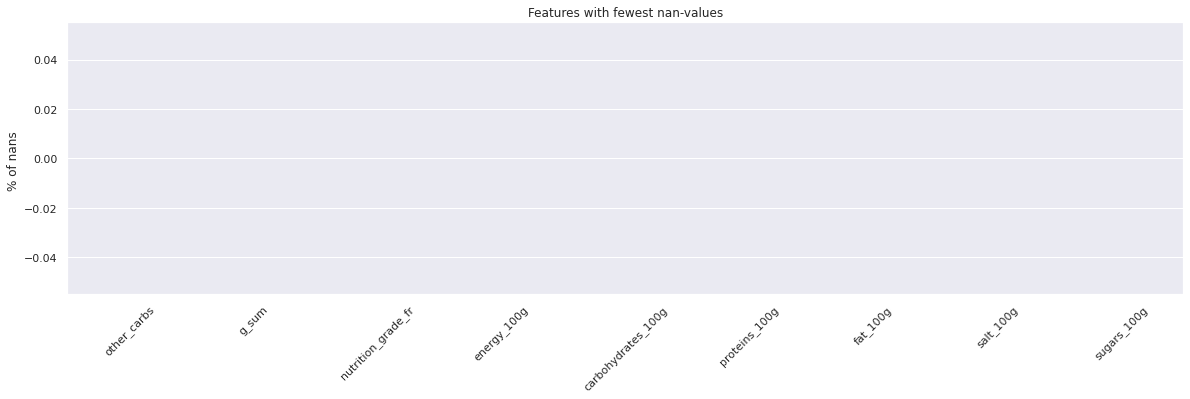

In [23]:
plt.figure(figsize=(20,5))
lows = sns.barplot(x=low_nans.index.values, y=low_nans.values, palette="Greens")
rotate_labels(lows)
plt.title("Features with fewest nan-values")
plt.ylabel("% of nans ")

In [24]:
X= original[['sugars_100g', 'salt_100g','fat_100g','proteins_100g','carbohydrates_100g', 'energy_100g']]
y=original[['nutrition_grade_fr']]

In [25]:
X = np.asarray(original[['sugars_100g', 'salt_100g','fat_100g','proteins_100g','carbohydrates_100g', 'energy_100g']])
X[0:5]

array([[1.42900e+01, 0.00000e+00, 2.85700e+01, 3.57000e+00, 6.42900e+01,
        2.24300e+03],
       [1.78600e+01, 6.35000e-01, 1.78600e+01, 1.78600e+01, 6.07100e+01,
        1.94100e+03],
       [3.57000e+00, 1.22428e+00, 5.71400e+01, 1.78600e+01, 1.78600e+01,
        2.54000e+03],
       [1.56200e+01, 1.39700e-01, 1.87500e+01, 1.40600e+01, 5.78100e+01,
        1.83300e+03],
       [3.33000e+00, 1.60782e+00, 3.66700e+01, 1.66700e+01, 3.66700e+01,
        2.23000e+03]])

In [26]:
y =original[['nutrition_grade_fr']]
y[0:5]

,nutrition_grade_fr
1,d
2,b
3,d
7,c
12,d


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y =  le.fit_transform(y)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [28]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.12211484, -0.32749129,  0.82143575, -0.49776912,  1.11290838,
         1.32516114],
       [ 0.05066842, -0.17599514,  0.16968906,  1.23076079,  0.985991  ,
         0.92355616],
       [-0.64094858, -0.0354067 ,  2.56003547,  1.23076079, -0.53311783,
         1.72011704],
       [-0.0577446 , -0.29416214,  0.22384915,  0.77110973,  0.88318084,
         0.77993583],
       [-0.65256426,  0.05609697,  1.31435342,  1.08681743,  0.13373018,
         1.30787351]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (156808, 6) (156808,)
Test set: (39202, 6) (39202,)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

# ****Train set/ Test set****

In [31]:
yhat = LR.predict(X_test)
yhat

array([4, 3, 3, ..., 3, 4, 3])

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average='weighted')

0.3714309946934383

In [33]:
jaccard_score(y_test, yhat, average='micro')

0.3785561064809931

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.61      0.82      0.70      7317
           2       0.53      0.32      0.40      9503
           3       0.52      0.65      0.58     13314
           4       0.55      0.42      0.47      9043

    accuracy                           0.55     39202
   macro avg       0.44      0.44      0.43     39202
weighted avg       0.55      0.55      0.53     39202



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Modeling SVM with sklearn**

In [35]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [36]:
yhat = clf.predict(X_test)
yhat[0:5]

array([4, 4, 2, 1, 1])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2, 4])
np.set_printoptions(precision=2)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.73      0.78      0.75      7317
           2       0.67      0.61      0.64      9503
           3       0.71      0.77      0.74     13314
           4       0.82      0.73      0.77      9043

    accuracy                           0.73     39202
   macro avg       0.58      0.58      0.58     39202
weighted avg       0.73      0.73      0.73     39202



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7251848334377399

In [39]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average='weighted')

0.5714292891317517

In [40]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train, y_train)
yhat2 = clf1.predict(X_test)
yhat2[0:5]
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, average='weighted'))

Avg F1-score: 0.5680
Jaccard score: 0.4008


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train

array([[-0.79, -0.21, -0.53, -0.06, -0.56, -0.79],
       [ 0.4 , -0.1 ,  0.28, -0.5 ,  0.67,  0.53],
       [-0.81,  0.03,  0.54,  1.37, -1.16, -0.05],
       ...,
       [ 1.47,  0.1 , -0.89, -0.88,  0.54, -0.72],
       [-0.21, -0.3 , -0.81, -0.58, -0.72, -1.22],
       [-0.81, -0.11,  0.79,  2.34, -1.16,  0.33]])

In [42]:
y_test

array([3, 4, 3, ..., 3, 2, 4])

In [43]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [44]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 4, 3, 1, 2])

In [45]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8612570787204734
Test set Accuracy:  0.7885567062904953


In [46]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1,ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.8 , 0.78, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79])

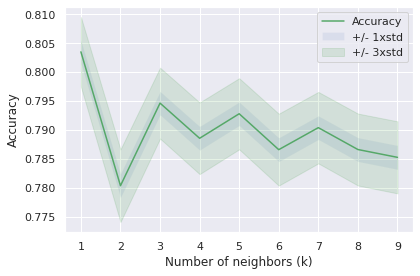

In [47]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy','+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.tight_layout()
plt.show()

In [48]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8034794143155961 with k= 1
